Um corpo de massa 1 kg move-se num oscilador harmónico forçado. Se a posição de equilíbrio for a origem do eixo $x_{eq}$ = $0$ m, o oscilador harmónico tem a energia potencia $E_p=\frac12kx²$ e exerce no corpo a força

$$F_x=-kx$$

O oscilador é amortecido pela força $-bv_x$ e sujeito à força externa $F_0cos(\omega_ft)$.

Considere $k$ = 1 N/m, $b$ = 0.05 kg/s, $F_0$ = 7.5 N e $\omega_f$ = 1.0 rad/s.


a) Calcule numericamente a lei do movimento, no caso em que a velocidade inicial é nula e a posição inicial 4
m. Tem confiança no seu resultado?


In [90]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [91]:
# Variables

m = 1  # kg
r_eq = 0  # m
k = 1  # N/m
b = 0.05  # kg/s
F_0 = 7.5  # N
omega_f = 1.0  # rad/s

In [92]:
# Time

t_start, t_end = 0, 250
dt = 0.01
n = int((t_end - t_start) / dt)

In [93]:
# Functions


def force(r):
    return -k * r


def external_force(t):
    return F_0 * np.cos(omega_f * t)


def softening_force(v):
    return -b * v


def acceleration_formula(r, v, t):
    return (force(r) + external_force(t) + softening_force(v)) / m


def is_local_maximum(array, index):
    return array[index - 1] < array[index] > array[index + 1]


def get_all_local_maxima(array):
    maxima = [i for i in range(1, len(array) - 1) if is_local_maximum(array, i)]
    return maxima


def get_period_from_array(r):
    maxima = get_all_local_maxima(r)
    return (maxima[-1] - maxima[-2]) * dt


def potential_energy(r):
    return 0.5 * k * r**2


def kinetic_energy(v):
    return 0.5 * m * v**2

In [94]:
# Initial conditions

r0 = 4
v0 = 0
a0 = acceleration_formula(r0, v0, 0)

In [95]:
r = np.zeros(n)
v = np.zeros(n)
a = np.zeros(n)
t = np.zeros(n)

r[0] = r0
v[0] = v0
a[0] = a0
t[0] = t_start

# Euler-Cromer method

for i in range(1, n):
    a[i] = acceleration_formula(r[i - 1], v[i - 1], t[i - 1])
    v[i] = v[i - 1] + a[i - 1] * dt
    r[i] = r[i - 1] + v[i] * dt
    t[i] = t[i - 1] + dt

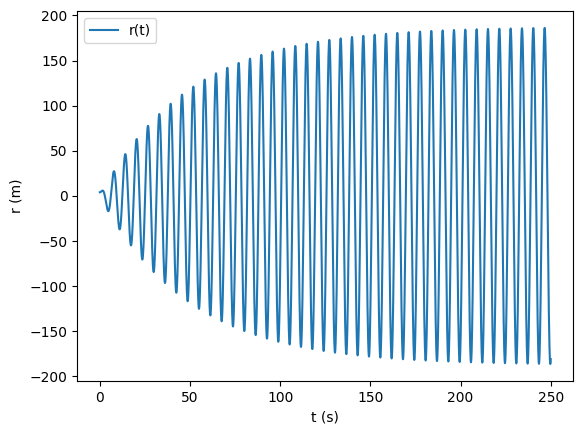

In [96]:
# Graph position

plt.plot(t, r, label="r(t)")
plt.xlabel("t (s)")
plt.ylabel("r (m)")
plt.legend()
plt.show()

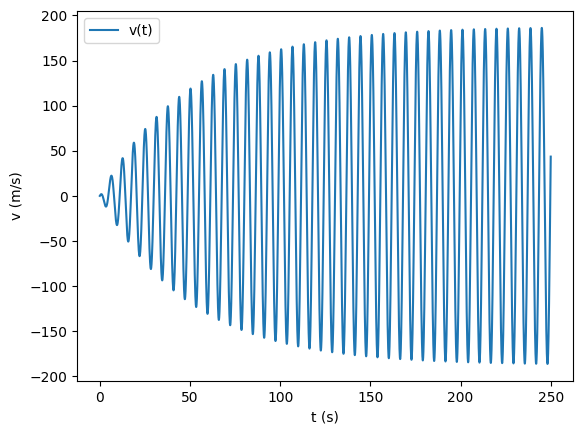

In [97]:
# Graph velocity

plt.plot(t, v, label="v(t)")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.legend()
plt.show()

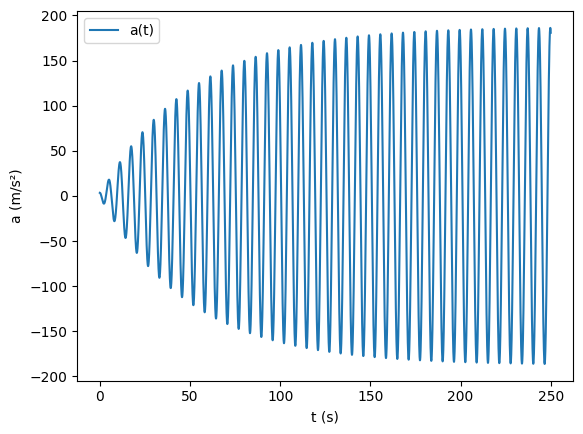

In [98]:
# Graph acceleration

plt.plot(t, a, label="a(t)")
plt.xlabel("t (s)")
plt.ylabel("a (m/s²)")
plt.legend()
plt.show()

b) Calcule a amplitude do movimento e o seu período no regime estacionário, usando os resultados numéricos.


In [99]:
amplitude = np.max(abs(r))
print("Amplitude: ", amplitude, "m")

Amplitude:  186.23180817828273 m


In [100]:
period = get_period_from_array(r)
print("Period: ", period, "s")

Period:  6.29 s


e) Calcule a energia mecânica. É constante ao longo do tempo?


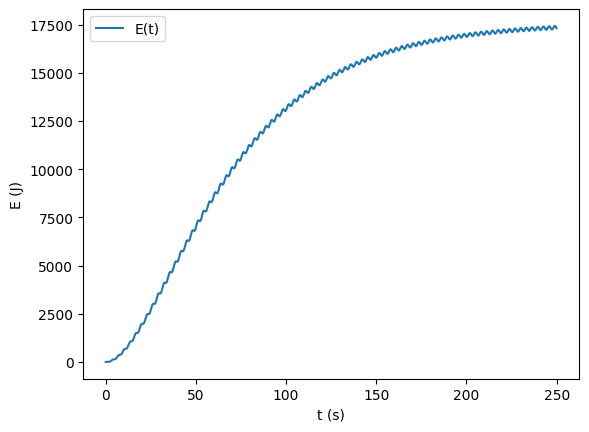

In [101]:
mechanical_energy = potential_energy(r) + kinetic_energy(v)

plt.plot(t, mechanical_energy, label="E(t)")
plt.xlabel("t (s)")
plt.ylabel("E (J)")
plt.legend()
plt.show()